# Scrapy

* Last updated: 20170326 20161004
* todo rename ds_web_data -> ds_web_scrapy

## 1.1 학습내용

### 1.1.1 목표

* Scrapy를 사용하여 데이터를 추출할 수 있다.

### 1.1.2 목차

* 1.2 단순페이지가 아닌 경우의 웹데이터 수집하기
* 1.3 Scrapy
* 1.4 설치
* 1.5 Scrapy shell
* 1.6 Scrapy project
* 1.7 Basic Scrapy
* 1.8 Link Extractors
* 1.9 Setting
* 1.10 Logging
* 1.11 Pipelines


### 1.1.3 문제

* 웹데이터-1: 페이지가 있는 사이트 크롤링하기
    * toscrape.com 가상의 서점과 인용문을 제공하고 있어, 연습하기 좋은 사이트
* 웹데이터-2: 국제학회 목록 크롤링하기
* 웹데이터-3: Reddit 크롤링하기
    * Scrapy xpath
* 웹데이터 : 네이버 음악 목록 가져오기 (다음 페이지)

### 1.1.4 연습
* 연습 웹데이터-1: 코스피200 데이터 가져오기
    * Google Finance에서 Scrapy를 사용해서 가져오기
    * xpath
    * sqlite db에 저장
* 연습 웹데이터-2: Scrapy를 사용하여 Tripadvisor 크롤링하기
    * unicode
    * css with spaces, ::pseudo-elements
    * [nok] next_link의 onclick() 미완성

## 1.2 단순페이지가 아닌 경우의 웹데이터 수집하기

* 웹페이지가 단순한 경우, 크롤링해서 데이터를 가져오는 것은 비교적 어렵지 않다.
* 웹서버에서 반환하는 response를 가져와서 데이터를 추출한다.
* 그러나, 페이지가 복잡한 경우, 링크를 포함해서 따라가야 하거나 javascript를 실행해야 내용이 나타나는 경우 추가 작업이 필요하다.

구분 | 설명
-----|-----
링크 | 페이지에 링크가 포함되어 있는 경우
페이징 | 여러 페이지로 되어 있어 일련번호, 다음을 눌러 다음 페이지로 이동하는 경우
이미지 | 페이지에 이미지를 내려받아야 하는 경우
폼 | 페이지에 폼
동적페이지 | 자바스크립트가 실행, dynamic pages

* 도구

도구 | 설명 | 적합한 경우
-----|-----|-----
Selenium | 화면을 테스트하기 위한 자동화 도구, 크롤링에 사용할 수 있다. | javascript, ajax 등을 포함하는 dynamic pages에 사용
Scrapy | crawling framework | multiple pages. form과 같이 javascript을 포함한 페이지도 가능.

## 1.3 Srapy: Crawling framework

### 1.3.1 개요

* 웹사이트 크롤링 프레임워크.
* xpath, css selector를 사용할 수 있다. Scrapy는 lxml을 사용하고 있다.
* 병렬작업이 가능하다. Python으로 만들어진 비동기 네트워크 라이브러리 Twisted를 사용한다.
* 웹데이터를 엑셀과 같이 구조적인 데이터 형식으로 만들기
* 상속을 사용한다.


In [9]:
import iplantuml

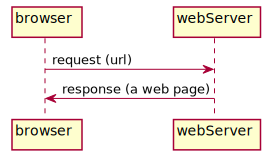

In [2]:
%%plantuml
@startuml
browser -> webServer:request (url)
webServer -> browser:response (a web page)
@enduml

## 1.4 설치

* 설치 요건 - python 2.7 or above 3.3, openssl, lxml, twisted
* pip
```
pip install scrapy
```

* anaconda
    * anaconda prompt 단말을 열어서 명령어를 입력한다.
```
C:\> conda install -c scrapinghub scrapy
```

    * anaconda prompt에서 scrapy shell을 입력하면 shell환경이 실행된다.
```
C:\> scrapy shell
In [1]:
```

* 설치하고 나면 버전을 확인한다.
```
scrapy version
```

* scrapy cli 명령어

명령어 | 설명
-----|-----
genspider | Generate new spider using pre-defined templates
runspider | 프로젝트를 생성하지 않고 실행 (프로젝트 생성하면 crawl명령어)
settings  | 설정 내용 가져오기
shell     | 콘솔 기능 사용하기
startproject | 프로젝트 생성하기
version    | 버전 확인하기

* spider 종류:
    * scrapy genspider명령어로 목록을 볼 수 있다.
```
scrapy genspider -l
```

타잎 | 설명
-------|-------
Spider | 가장 단순한 'basic' spider, start_urls 또는 start_requests()에서 반환된 url을 크롤링
CrawlSpider | regex rules에 따라 link follow
XMLFeedSpider | XML을 parse
CSVFeedSpider | CSV feeds
SiteMapSpider | site map


In [14]:
!scrapy genspider -l

Available templates:
  basic
  crawl
  csvfeed
  xmlfeed


## 1.5 Scrapy shell

* /usr/local/bin/scrapy를 실행
* Python shell이 실행되면서, 사용할 수 있는 객체를 생성하여 제공한다.
    * scrapy, crawler, spider, request, response...
* Scrapy shell 연습 예제
```
$ scrapy shell http://stackoverflow.com
>>> response.url
>>> response.headers
>>> response.xpath('//title')
>>> response.xpath('//title/text()')
```

* scrapy shell 연습 예제 - xpath, css

```
$ scrapy shell "https://data.go.kr"
In [1]: response.xpath('//title/text()')
Out[1]: [<Selector xpath='//title/text()' data=u'\uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138'>]

In [2]: response.xpath('//title/text()').extract()
Out[2]: [u'\uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138']

In [3]: response.css('title').extract()
Out[3]: [u'<title>\uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138</title>']
```

## 1.6 Scrapy Project

### 1.6.1 프로젝트 절차

* 단계1: 프로젝트 생성
    * 프로젝트를 생성할 디렉토리로 이동
```
cd mypjt
scrapy startproject myspider
```
        
        * 1 'scrapy': 프레임워크를 사용
        * 2 'startproject': 프로젝트를 생성
        * 3 'myspider': 프로젝트 명칭
        * 4 크롤링 대상 도메인

    * 생성내용
```
mypjt (내가 만듦)
├── myspider (디렉토리명은 내가 만듦, 안의 모든 파일들은 자동 생성)
│   ├── __init__.py
│   ├── items.py
│   ├── pipelines.py
│   ├── settings.py
│   └── spiders
│       ├── __init__.py
│       └── hello.py (내가 만듦)
└── scrapy.cfg
```

* 단계2 'items.py': item 정의
```
cd myspider/
vim items.py
```

    * 클래스를 만들어 가져올 데이터 항목을 정의한다.

* 단계3 'hello.py': Spider 클래스
```
cd spiders/
vim hello.py
```

    * 1 명칭은 프로젝트마다 다르게 명명한다.
    * 2 'start_urls'에서 시작
    * 3 parse()함수에서 원하는 항목을 추출

* 단계4: 테스트
```
scrapy crawl 또는
scrapy crawl _myAppName (name="_myAppName", Spider 클래스에 정의된 명칭)
```

* 단계5: 저장
    * pipeline을 이용해서 database에 저장할 수 있다.
```
scrapy crawl _myAppName -o _myAppName.csv -t csv
```

### 1.6.2 실행

* 프로젝트의 spider명으로 실행한다.
* 출력파일을 적어준다.

In [ ]:
!scrapy crawl _myAppName -o _myAppName.csv -t csv

## 1.7 Basic Scrapy

* 단순한 예제
* scrapy.spiders.Spider를 사용 (CrawlSpider는 다음에 사용한다.)
* 절차
    * Item클래스로 데이터 항목을 정의
    * start_urls (또는 start_requests())의 url로 Request를 생성
    * callback 함수 parse() 호출
        * Request로 요청
        * Response (dict, Item, Request의 형태로 반환)
        * 돌려 받은 response(s)에서 데이터 항목을 추출한다.
        * 추출한 항목을 반환
        * url이 한 개이므로 다음 페이지 처리가 없다.

In [10]:
import iplantuml

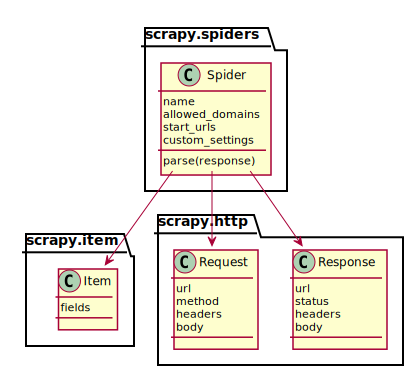

In [20]:
%%plantuml
@startuml
class scrapy.item.Item {
    fields
}
class scrapy.spiders.Spider {
    name
    allowed_domains
    start_urls
    custom_settings
    parse(response)
}
class scrapy.http.Response {
    url
    status
    headers
    body
}
class scrapy.http.Request {
    url
    method
    headers
    body
}
scrapy.spiders.Spider -> scrapy.item.Item
scrapy.spiders.Spider -> scrapy.http.Response
scrapy.spiders.Spider -> scrapy.http.Request
@enduml

### 1.7.1 데이터 항목을 정의

클래스 | 설명
-----|-----
scrapy.item.Item | 웹에서 추출한 데이터 항목을 저장하는 데이터 구조, dict를 사용
scrapy.item.Field | 데이터 개별 항목을 저장

In [1]:
import scrapy
class myItem(scrapy.item.Item):
    title = scrapy.item.Field()

In [3]:
my=myItem(title='hello')
print my['title']

hello


### 1.7.2 Requests와 Responses

* 앞서 크롤링하는 것과 다르지 않게
    * HTTP request를 만들어 'scrapy.http.Request' 객체를 생성해서 요청하고,
    * 그 결과 HTTP response를 'scrapy.http.Response' 객체로 반환

* Request는 url목록을 가져와서 생성한다.
    * allowed_domains: 허용되는 도메인 목록, python list.
    * start_urls: url 목록.


In [11]:
import iplantuml

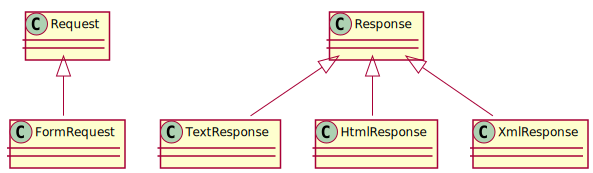

In [14]:
%%plantuml
@startuml
Request <|-- FormRequest
Response <|-- TextResponse
Response <|-- HtmlResponse
Response <|-- XmlResponse
@enduml

In [5]:
resp=scrapy.http.Request(url="http://www.example.com/")

In [10]:
type(resp)

scrapy.http.request.Request

### 1.7.3 callback

* scrapy.http.Request에 callback 함수를 정의할 수 있다.
* Request가 실행되어 Response를 가져오면, callback함수가 호출된다.

```
scrapy.Request("http://www.example.com/some_page.html",
    callback=self.parse_this)
```

### 1.7.4 Selectors

* 모든 항목 추출 '.extract()'
* 첫째 항목 추출 '.extract_first()'

* xpath .text()
* CSS selectors는 text or attribute nodes를 'CSS3 pseudo-elements' '::'를 사용해서 추출
'::selection'

In [ ]:
%%plantuml
@startuml
class scrapy.selector.Selector {
    xpath(query)
    css(query)
    re(regex)
    extract()
}
@enduml

In [1]:
htmlstr='''<html>
 <head>
  <title>My Website</title>
 </head>
 <body>
  <span>Hello world!!!</span>
  <div class='links'>
   <a href='one.html'>Link 1<img src='image1.jpg'/>Name: test image name</a>
   <a href='two.html'>Link 2<img src='image2.jpg'/></a>
   <a href='three.html'>Link 3<img src='image3.jpg'/></a>
  </div>
 </body>
</html>'''

In [5]:
from scrapy.selector import Selector
from scrapy.http import HtmlResponse

print Selector(text=htmlstr).xpath('//span/text()').extract()
print Selector(text=htmlstr).css('span::text').extract()

[u'Hello world!!!']
[u'Hello world!!!']


In [8]:
print Selector(text=htmlstr).xpath('//div[@class="links"]/a/text()').extract()
print Selector(text=htmlstr).css('.links > a::text').extract()

[u'Link 1', u'Name: test image name', u'Link 2', u'Link 3']
[u'Link 1', u'Name: test image name', u'Link 2', u'Link 3']


In [22]:
Selector(text=htmlstr).xpath('//a[contains(@href, "image")]/text()')

[]

In [25]:
Selector(text=htmlstr).xpath('//a[contains(@href, "html")]/text()').re(r'Name:\s*(.*)')

[u'test image name']

In [7]:
Selector(text=htmlstr).css('title').extract()

[u'<title>My Website</title>']

In [8]:
Selector(text=htmlstr).css('title::text').extract()

[u'My Website']

In [11]:
Selector(text=htmlstr).xpath('//a[contains(@href, "html")]/@href').extract()

[u'one.html', u'two.html', u'three.html']

In [10]:
Selector(text=htmlstr).css('a[href*=html]::attr(href)').extract()

[u'one.html', u'two.html', u'three.html']

In [11]:
%%writefile src/ds_web_data_hello_scrapy.py
import scrapy

class myItem(scrapy.item.Item):
    title = scrapy.item.Field()

class myCrawler(scrapy.spiders.Spider):
    name = 'myAppName'
    start_urls = ['https://data.go.kr']
    def parse(self, response):
        item = myItem()
        #title = scrapy.selector.Selector(response).xpath('//title/text()')
        title = scrapy.selector.Selector(response).css('title').extract()
        print "---Hello---", title
        item['title']=title
        return item


Overwriting src/ds_web_data_hello_scrapy.py


* scrapy crawl은 프로젝트에서 사용하는 명령어, 프로젝트를 생성하지 않고 하나의 파일로 실습하였기 때문에 오류.
```
scrapy crawl <spider>
```

In [9]:
!scrapy crawl myAppName

Scrapy 1.3.2 - no active project

Unknown command: crawl

Use "scrapy" to see available commands


* scrapy 실행
    * scrapy runspider를 실행하면, 화면에 결과를 볼 수 있다. (윈도우에서 실행 ok!)
```
scrapy runspider src/ds_web_data_hello_scrapy.py
```
        
    * 가져온 데이터는 --output에, 로그는 --logfile에 저장된다.    

In [12]:
!scrapy runspider src/ds_web_data_hello_scrapy.py

2017-03-16 06:58:36 [scrapy.utils.log] INFO: Scrapy 1.3.2 started (bot: scrapybot)
2017-03-16 06:58:36 [scrapy.utils.log] INFO: Overridden settings: {}
2017-03-16 06:58:36 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.logstats.LogStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.corestats.CoreStats']
2017-03-16 06:58:36 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.DownloadTimeoutMiddleware',
 'scrapy.downloadermiddlewares.defaultheaders.DefaultHeadersMiddleware',
 'scrapy.downloadermiddlewares.useragent.UserAgentMiddleware',
 'scrapy.downloadermiddlewares.retry.RetryMiddleware',
 'scrapy.downloadermiddlewares.redirect.MetaRefreshMiddleware',
 'scrapy.downloadermiddlewares.httpcompression.HttpCompressionMiddleware',
 'scrapy.downloadermiddlewares.redirect.RedirectMiddleware',
 'scrapy.downloadermiddlewares.cookies.CookiesMiddle

* 데이터의 저장
    * JSON
    * CSV
    * XML
    * URI를 사용하여, 파일, S3, ftp 등으로 출력할 수 있다.

In [13]:
!scrapy runspider src/ds_web_data_hello_scrapy.py --output='src/ds_web_data_hello.csv' -t csv --logfile='src/ds_web_data_hello.log'

---Hello--- [u'<title>\r\n    \r\n        \r\n        \r\n            \uacf5\uacf5\ub370\uc774\ud130\ud3ec\ud138\r\n        \r\n    \r\n\r\n</title>']


## 1.8 Link Extractors

* scrapy.http.Response 객체에서 링크를 추출해서 다음 페이지로 계속하기
* scrapy.CrawlSpider를 사용할 수 있다
* basic spider에서도 rules을 사용해서 추출할 수 있다.

참조
https://www.tutorialspoint.com/scrapy/scrapy_following_links.htm

## 웹데이터-1: 페이지가 있는 사이트 크롤링하기

* http://doc.scrapy.org/en/1.1/intro/tutorial.html 예제

* 절차
    * 처음
        * start_urls로 Request생성
        * callback 함수 호출 - parse()
            * xpath 데이터 항목 추출
            * iterator생성 (yield)
    * 다음
        * 다음 페이지 url로 Request생성
        * callback 함수 호출 - parse()

* 다음 페이지 가져오기
    * 주소창에는 '/page/다음페이지'가 호출된다.
```
http://quotes.toscrape.com/page/2/
http://quotes.toscrape.com/page/3/
```
    
    * 콘솔창을 열어 보면, "Next"에 다음 페이지의 링크가 걸려 있다.
    * '/page/다음페이지' xpath를 추출한다.
    * start_urls의 도메인 'http://quotes.toscrape.com/'에 덧붙인다.
    * 다음 페이지를 가져오는 yield는 return과 같은 기능이지만, generator이다 (iterator)
```
<li class="next">...
    <a href="/page/2/">...</a>
</li>
추출하는 xpath는 response.xpath('//li[@class="next"]/a/@href').extract_first()
```


In [3]:
%%writefile src/ds_web_data_paging.py
import scrapy

class QuoteItem(scrapy.Item):
    text = scrapy.Field()
    author = scrapy.Field()

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://quotes.toscrape.com',
    ]
    def parse(self, response):
        for quote in response.xpath('//div[@class="quote"]'):
            item = QuoteItem()
            item['text'] = quote.xpath('span[@class="text"]/text()').extract_first()
            item['author'] = quote.xpath('span/small/text()').extract_first()
            print "crawling ",item['author']
            yield item
        next_page = response.xpath('//li[@class="next"]/a/@href').extract_first()
        if next_page:
            next_page = response.urljoin(next_page)
            print "--> visiting ",next_page
            yield scrapy.Request(next_page, callback=self.parse)


Overwriting src/ds_web_data_paging.py


* scrapy shell
```
jsl@jsl-smu$ scrapy shell http://quotes.toscrape.com/page/1/
In [1]: response.xpath('//div[@class="quote"]')
Out[1]: 
[<Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>,
 <Selector xpath='//div[@class="quote"]' data=u'<div class="quote" itemscope itemtype="h'>]

In [2]: quotes=response.xpath('//div[@class="quote"]')

In [3]: for quote in quotes:
   ...:     print quote.xpath('span[@class="text"]/text()').extract_first()
   ...:     
“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“All that is gold does not glitter,
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”

In [4]: response.xpath('//li[@class="next"]/a/@href').extract_first()
Out[4]: u'/page/2/'
```

In [4]:
!scrapy runspider src/ds_web_data_paging.py -o src/ds_web_data_paging.json -t json --logfile src/ds_web_data_paging.logfile

crawling  Albert Einstein
crawling  J.K. Rowling
crawling  Albert Einstein
crawling  Jane Austen
crawling  Marilyn Monroe
crawling  Albert Einstein
crawling  André Gide
crawling  Thomas A. Edison
crawling  Eleanor Roosevelt
crawling  Steve Martin
--> visiting  http://quotes.toscrape.com/page/2/
crawling  Marilyn Monroe
crawling  J.K. Rowling
crawling  Albert Einstein
crawling  Bob Marley
crawling  Dr. Seuss
crawling  Douglas Adams
crawling  Elie Wiesel
crawling  Friedrich Nietzsche
crawling  Mark Twain
crawling  Allen Saunders
--> visiting  http://quotes.toscrape.com/page/3/
crawling  Pablo Neruda
crawling  Ralph Waldo Emerson
crawling  Mother Teresa
crawling  Garrison Keillor
crawling  Jim Henson
crawling  Dr. Seuss
crawling  Albert Einstein
crawling  J.K. Rowling
crawling  Albert Einstein
crawling  Bob Marley
--> visiting  http://quotes.toscrape.com/page/4/
crawling  Dr. Seuss
crawling  J.K. Rowling
crawling  Bob Marley
crawling  Mother Teresa
crawling  J.K. Rowling
crawling  Charles

## 웹데이터-2: 국제학회 목록 크롤링하기

* 단일 페이지는 비교적 쉽게 크롤링할 수 있다.
* 목록을 가져온다.
    * chrome javascript console
```
> nodes=$$('div.content-r-full table.nogrid-nopad tr')
```

    * scrapy shell
```
$ scrapy shell 'http://www.ieee.org/conferences_events/conferences/search/index.html'
>>> nodes=response.css('div.content-r-full table.nogrid-nopad tr')
>>> for node in nodes:
       print node.css('p > a[href]::text').extract()
```

* 페이징 기능이 포함된 pagination
    * 페이지 1 2 3 ... 일련번호 seletor를 찾는다
        * ieee 페이지는 '|>'를 찾아야 한다.
        * .pagination > a[href]의 몇 번째인지 수작업으로 찾는다 (12번째?)
    * href의 값을 xpath에서 꺼낸다.
    ```
    response.css('.pagination > a[href]:nth-child(10)').xpath('@href').extract_first()
    ```
    
    * 이 href가 start_urls와 합쳐져서 다음 페이지로 링크가 만들어지고, 이 링크를 검색한다.

* 해결 - for문 처음에 crawling 6[]이 왜?


In [3]:
%%writefile src/ds_web_data_ieee.py
import scrapy

class IeeeItem(scrapy.Item):
    confName = scrapy.Field()
    confDate = scrapy.Field()
    confPlace = scrapy.Field()

class IeeeSpider(scrapy.Spider):
    name = "ieeeConf"
    start_urls = [
        'http://www.ieee.org/conferences_events/conferences/search/index.html'
    ]
    def parse(self, response):
        nodes=response.css('div.content-r-full table.nogrid-nopad tr')
        #nodes=response.css('div.content-r-full table.nogrid-nopad tr.even')
        for node in nodes:
            ahrefs=node.css('p>a[href]')
            print len(ahrefs),
            item = IeeeItem()
            item['confName'] = ahrefs[0].css('::text').extract()
            item['confDate'] = ahrefs[1].css('::text').extract()
            item['confPlace'] = ahrefs[2].css('::text').extract()
            #print "crawling ",item['confName']
            yield item
        next_page = response.css('.pagination > a[href]:nth-child(12)').xpath('@href').extract_first() 
        if next_page:
            next_page = response.urljoin(next_page)
            print "--> visiting ",next_page
            yield scrapy.Request(next_page, callback=self.parse)


Overwriting src/ds_web_data_ieee.py


* 페이지가 많으면 프로그램이 오랫동안 실행된다. 명령창에서 실행하면서 중단할 수 있다.

In [ ]:
!scrapy runspider src/ds_web_data_ieee.py -o src/ds_web_data_ieee.json -t json --logfile src/ds_web_data_ieee.logfile

## 1.9 Settings

방법 | 설명
-----|-----
command line으로 설정 | -s LOG_FILE=scrapy.log
Spider에 설정 | custom_settings (참조: 아래 예제)
project 설정 | settings.py


In [1]:
import scrapy
class MySpider(scrapy.Spider):
    name = 'myspider'
    start_urls = ['http://example.com']
    def parse(self, response):
        print("Existing settings: %s" % self.settings.attributes.keys())

In [2]:
my=MySpider()
resp=scrapy.http.Request(my.start_urls[0])
my.parse(resp)

AttributeError: 'MySpider' object has no attribute 'settings'

In [7]:
my.start_urls

['http://example.com']

## 1.10 Logging

## 웹데이터-3: Reddit 크롤링하기

* small project는 그냥 아래처럼 만듦
* Items
* settings.py
    custome_settings
* link를 따라가면서 크롤링할 경우 위 문제 참조


In [13]:
%%writefile src/ds_web_data_textpost.py
import scrapy

class TextPostItem(scrapy.item.Item):
    title = scrapy.item.Field()
    url = scrapy.item.Field()
    submitted = scrapy.item.Field()

class RedditCrawler(scrapy.spiders.CrawlSpider):
    name = 'reddit_crawler'
    allowed_domains = ['reddit.com']
    start_urls = ['https://www.reddit.com/r/learnpython/new']
    custom_settings = {
        'BOT_NAME': 'reddit-scraper',
        'DEPTH_LIMIT': 3,
        'DOWNLOAD_DELAY': 3
    }
    def parse(self, response):
        s = scrapy.selector.Selector(response)
        next_link = s.xpath('//span[@class="nextprev"]//a/@href').extract()[0]
        if len(next_link):
            print "--> visiting ",next_link
            yield self.make_requests_from_url(next_link)
        posts = scrapy.selector.Selector(response).xpath('//div[@id="siteTable"]/div[@onclick="click_thing(this)"]')
        for post in posts:
            i = TextPostItem()
            i['title'] = post.xpath('div[2]/p[1]/a/text()').extract()[0]
            i['url'] = post.xpath('div[2]/ul/li[1]/a/@href').extract()[0]
            i['submitted'] = post.xpath('div[2]/p[2]/time/@title').extract()[0]
            print "crawling ",i['title']
            yield i


Overwriting src/ds_web_data_textpost.py


* 출력없이 실행
    * log 저장, 출력 저장

In [14]:
!scrapy runspider src/ds_web_data_textpost.py -o src/ds_web_data_textpost.json -t json --logfile src/ds_web_data_textpost.logfile

--> visiting  https://www.reddit.com/r/learnpython/new?count=25&after=t3_533qt2
crawling  Separate lines to words
crawling  First time writing a bot using Python, not sure where I'm going wrong. [x-post /r/learnprogramming]
crawling  Having trouble with the eval function, what should I try next?
crawling  Bizarre music note symbols instead of newlines on pywin32 with Word
crawling  Checking for anagrams
crawling  Memoization example - dictionary inside method, or outside?
crawling  Tensorboard Explained in 5 Min
crawling  Script running the both if and else statement EVERYTIME and also printing \n and \b
crawling  [Newbie] Code to remove vowels from string
crawling  Does PyQt5 or PySide currently work with the most recent Qt 5 QML?
crawling  benefits of “from X import *” on “import X” if there are any
crawling  What's wrong with this code?
crawling  How do I get the if to run
crawling  can someone please give me a clue on how to append the return value of a function into a list
crawlin

## 1.11 Pipelines

* Item클래스의 데이터항목이 추출되고 나면, 다음 단계로 Pipeline클래스를 실행할 수 있다.
* Pipeline은 추출 데이터 항목의 정련, 검증 또는 데이터베이스에 저장하는 용도로 사용한다.
* Pipeline은 클래스로 구현한다. callback으로 'process_item()'이 호출된다.
```
class Pipeline(object):
    def process_item(self, item, spider):
```

In [17]:
import iplantuml

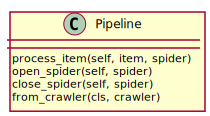

In [18]:
%%plantuml
@startuml
class Pipeline {
    process_item(self, item, spider)
    open_spider(self, spider)
    close_spider(self, spider)
    from_crawler(cls, crawler)
}
@enduml

* Pipeline을 settings.py에 등록해 놓아야 실행된다.
    * ITEM_PIPELINES는 dict로 설정, 숫자는 우선순위.
```
ITEM_PIPELINES = {'myproject.pipelines.myPipeline': 100}
```

* 현재 파일의 custome_settings로 설정할 수 있다.
    * 현재 프로그램의 파일명을 사용해서 Pipeline클래스를 지정한다.
    * ITEM_PIPELINES는 사전에 정의된 키
    * MONGO관련 키는 사용자가 정의할 수 있다.
```
"ITEM_PIPELINES":{'ds_web_data_ieee_pipeline.IeeePipeline': 100}
"MONGO_URI":"localhost:27017",
"MONGO_DATABASE":"ieee"
```

In [ ]:
%%writefile src/tmp.py
import os
fname=os.path.basename(__file__)
print fname
print os.path.splitext(fname)[0]

In [18]:
!python src/tmp.py

tmp.py
tmp


* Pipeline클래스를 사용해서 파일과 MongoDB에 저장한다.

In [15]:
%%writefile src/ds_web_data_ieee_pipeline.py
import scrapy
import json
#import io
import os
import logging
import pymongo

class IeeeItem(scrapy.Item):
    confName = scrapy.Field()
    confDate = scrapy.Field()
    confPlace = scrapy.Field()

class IeeeSpider(scrapy.Spider):
    name = "ieeeConf"
    start_urls = [
        'http://www.ieee.org/conferences_events/conferences/search/index.html'
    ]
    custom_settings = {
        "ITEM_PIPELINES":{
            os.path.splitext(os.path.basename(__file__))[0]+"."+"IeeeFilePipeline":100,
            os.path.splitext(os.path.basename(__file__))[0]+"."+"IeeeMongoPipeline":200
        },
        "LOG_LEVEL":"CRITICAL",
        "MONGO_URI":"localhost:27017",
        "MONGO_DATABASE":"ieee"
    }
    def parse(self, response):
        nodes=response.css('div.content-r-full table.nogrid-nopad tr')
        #nodes=response.css('div.content-r-full table.nogrid-nopad tr.even')
        for node in nodes:
            ahrefs=node.css('p>a[href]')
            print len(ahrefs),
            item = IeeeItem()
            item['confName'] = ahrefs[0].css('::text').extract()
            item['confDate'] = ahrefs[1].css('::text').extract()
            item['confPlace'] = ahrefs[2].css('::text').extract()
            #print "crawling ",item['confName']
            yield item
        next_page = response.css('.pagination > a[href]:nth-child(12)').xpath('@href').extract_first() 
        if next_page:
            next_page = response.urljoin(next_page)
            print "--> visiting",next_page
            yield scrapy.Request(next_page, callback=self.parse)

class IeeeFilePipeline(object):
    def open_spider(self, spider):
        print "-----> opening file to dump..."
        self.file = open(os.path.join('src','ds_web_data_ieee_pipeline_file.json'), 'w')
    def process_item(self, item, spider):
        #print "-----> dumping"
        line = json.dumps(dict(item), ensure_ascii=False) + "\n"
        self.file.write(line)
        return item
    def close_spider(self, spider):
        print "-----> dumped and closing file..."
        self.file.close()

class IeeeMongoPipeline(object):
    collection_name = 'conf'
    def __init__(self, mongo_uri, mongo_db):      
        self.mongo_uri = mongo_uri
        self.mongo_db = mongo_db
    @classmethod
    def from_crawler(cls, crawler):
        return cls(
            mongo_uri=crawler.settings.get('MONGO_URI'),
            mongo_db=crawler.settings.get('MONGO_DATABASE', 'ieee')
        )
    def open_spider(self, spider):
        print "-----> connecting to Mongo..."
        self.client = pymongo.MongoClient(self.mongo_uri)
        self.db = self.client[self.mongo_db]
    def close_spider(self, spider):
        print "-----> closing Mongo..."
        self.client.close()
    def process_item(self, item, spider):
        self.db[self.collection_name].insert(dict(item))
        return item


Writing src/ds_web_data_ieee_pipeline.py


In [16]:
!scrapy runspider src/ds_web_data_ieee_pipeline.py --logfile src/ds_web_data_ieee_pipeline.logfile

-----> opening file to dump...
-----> connecting to Mongo...
6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 --> visiting http://www.ieee.org/conferences_events/conferences/search/index.html?RANGE_FROM_DATE=&RANGE_TO_DATE=&KEYWORDS=&COUNTRY=ALL&STATE=ALL&CITY=ALL&REGION=ALL&RECORD_NUM=ALL&SPONSOR=ALL&EXHIBIT=ALL&TUTORIALS=ALL&RowsPerPage=20&PageLinkNum=10&ActivePage=1&SORTORDER=DESC&SORTFIELD=START_DATE&ROWSTART=0&CONF_SRCH_RDO=
6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 --> visiting http://www.ieee.org/conferences_events/conferences/search/index.html?RANGE_FROM_DATE=&RANGE_TO_DATE=&KEYWORDS=&COUNTRY=ALL&STATE=ALL&CITY=ALL&REGION=ALL&RECORD_NUM=ALL&SPONSOR=ALL&EXHIBIT=ALL&TUTORIALS=ALL&RowsPerPage=20&PageLinkNum=10&ActivePage=845&SORTORDER=DESC&SORTFIELD=START_DATE&ROWSTART=16880&CONF_SRCH_RDO=
6 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 -----> closing Mongo...
-----> dumped and closing file...


## 연습 웹데이터-1: 코스피200 데이터 가져오기

* Google Finance에서 Scrapy를 사용해서 가져오기

* [구글 Finance](https://www.google.com/finance/)로 가서 
    * 검색창에 KOSPI 또는 KOSPI200
    * 좌측 메뉴에 index > Historical prices

* Google Finance KOSPI200 데이터 크롤링
    * 구를 개발자도구에서 xpath찾아서 (//*[@id="fjfe-click-wrapper"] 여기를 찾아서 클릭)
        * 가격
        * 볼륨
```
scrapy shell https://www.google.com/finance/historical?q=KRX%3AKOSPI200
>>> response.xpath('//td[@class="rgt"]/text()')
>>> [float(x.extract().strip()) for x in response.xpath('//td[@class="rgt"]/text()')]
>>> [int(x.extract().strip().replace(',','')) for x in response.xpath('//td[@class="rgt rm"]/text()')]
```

* 참조 src/ds_web_data_kospi200.py
    * parse()
        * scrapy가 url에 대해 request하고 그 결과로 response를 돌려받음.
        * response를 처리해서 item으로 넘겨주는 역할. urls을 여러 개 있는 경우 처리.
    * pipeline
        * 별도의 파일에 저장했을 경우 path를 써줌
        * 같은 파일에 저장했을 경우 path는 현재 파일의 'class DailyStockPipeline'
        * The pipeline function's signature looks like this:
            ```
            def process_item(self, item, spider):
            ```

        * item is the input to the pipeline and once you have done processing with the item you have to pass it to the next pipeline by returning item in that function.
        * set up settings in the ITEM_PIPELINES array.
            ```
            custom_settings = {
                'ITEM_PIPELINES' : { 'ds_web_data_kospi200.DailyStockPipeline': 300, }
            }
            ```
            
    * sqlited에서 결과 확인
* 'pipeline' 클래스가 있어서 현재 디렉토리를 사용해서 실습 (src/가 아님)

In [19]:
import iplantuml

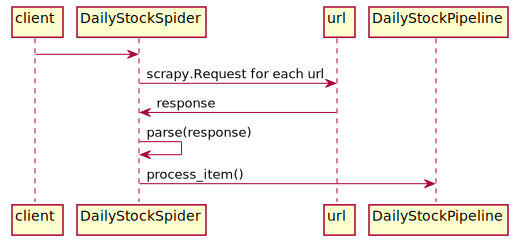

In [26]:
%%plantuml
@startuml
client -> DailyStockSpider
DailyStockSpider -> url:scrapy.Request for each url
url -> DailyStockSpider:scrapy.http.Response
DailyStockSpider -> DailyStockSpider:parse(response)
DailyStockSpider -> DailyStockPipeline:process_item()
@enduml

In [16]:
%%writefile ds_web_data_kospi200.py
import scrapy
import dateutil.parser
import numpy as np
import sqlite3
import os

class DailyStockItem(scrapy.Item):
    symbol = scrapy.Field()
    date = scrapy.Field()
    price_open = scrapy.Field()
    price_high = scrapy.Field()
    price_low = scrapy.Field()
    price_close = scrapy.Field()
    volume = scrapy.Field()

class DailyStockPipeline(object):
    #filename = 'dailystock.sqlite'
    filename = 'ds_web_data_kospi200.sqlite'

    def __init__(self):
        self.conn = None
        if os.path.exists(self.filename):
            self.conn = sqlite3.connect(self.filename)
        else:
            self.conn = sqlite3.connect(self.filename)
            self.conn.execute("""create table dailystock
                (symbol TEXT NOT NULL,
                 date TIMESTAMP NOT NULL,
                 price_open REAL,
                 price_high REAL,
                 price_low REAL,
                 price_close REAL,
                 volume INTEGER,
                 PRIMARY KEY (symbol, date))""")
            self.conn.commit()

    def process_item(self, item, domain):
        try:
            self.conn.execute('insert into dailystock values(?,?,?,?,?,?,?)',
                (item['symbol'], item['date'],
                 item['price_open'], item['price_high'],
                 item['price_low'], item['price_close'],
                 item['volume']))
            self.conn.commit()
        except Exception, e:
            print str(e)
        return item

class DailyStockSpider(scrapy.Spider):
    name = "dailystock"
    start_urls = ["https://www.google.com/finance/historical?q=KRX%3AKOSPI200"]
    #SPIDER_MODULES = ['tutorial.spiders']
    #NEWSPIDER_MODULE = 'tutorial.spiders'
    #ITEM_PIPELINES = { 'tutorial.pipelines.DailyStockPipeline': 300, }
    custom_settings = {
        'BOT_NAME' : 'tutorial',
        #'ITEM_PIPELINES' : { 'mykospi200.DailyStockPipeline': 300, },
        'ITEM_PIPELINES' : { 'ds_web_data_kospi200.DailyStockPipeline': 300, },
        'DOWNLOAD_HANDLERS' : { 's3': None, }
    }
    def parse(self, response):
        dates = [dateutil.parser.parse(x.extract().strip()) for x in response.xpath('//td[@class="lm"]/text()')]
        volumes = np.array([int(x.extract().strip().replace(',','')) for x in response.xpath('//td[@class="rgt rm"]/text()')])
        prices = np.reshape([float(x.extract().strip()) for x in response.xpath('//td[@class="rgt"]/text()')], (-1, 4))
        for d, v, p in zip(dates, volumes, prices):
          symbol = "KOSPI"
          date = d
          price_open = p[0]
          price_high = p[1]
          price_low = p[2]
          price_close = p[3]
          volume = v
          yield {"symbol": symbol, "date": date, 
                 "price_open": price_open, "price_high": price_high, 
                 "price_low": price_low, "price_close": price_close, 
                 "volume": volume}


Writing ds_web_data_kospi200.py


* Scrapy 실행
    * json output 없어도 ok?

In [2]:
!scrapy runspider ds_web_data_kospi200.py --output='ds_web_data_kospi200.json' -t json --logfile='ds_web_data_kospi200.log'

UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed: dailystock.symbol, dailystock.date
UNIQUE constraint failed

* sqlite 데이터베이스 dailystok 테이블 조회 (위 프로그램 결과)

In [18]:
%%writefile ds_web_data_kospi200.sql
select * from dailystock;

Writing ds_web_data_kospi200.sql


In [20]:
!sqlite3 ds_web_data_kospi200.sqlite < ds_web_data_kospi200.sql

KOSPI|2016-09-13 00:00:00|253.39|253.55|251.66|251.77|74548000
KOSPI|2016-09-12 00:00:00|252.37|253.43|250.53|250.53|66332000
KOSPI|2016-09-09 00:00:00|258.68|258.94|256.21|257.31|70053000
KOSPI|2016-09-08 00:00:00|260.72|261.48|259.41|260.86|79382000
KOSPI|2016-09-07 00:00:00|261.15|262.1|260.31|260.31|68749000
KOSPI|2016-09-06 00:00:00|259.39|261.16|259.26|260.93|49969000
KOSPI|2016-09-05 00:00:00|257.85|259.74|257.63|259.64|54167000
KOSPI|2016-09-02 00:00:00|256.16|256.73|255.57|256.5|49266000
KOSPI|2016-09-01 00:00:00|254.95|256.13|253.86|256.03|56098000
KOSPI|2016-08-31 00:00:00|257.21|257.49|255.9|256.87|66352000
KOSPI|2016-08-30 00:00:00|257.27|258.93|257.0|257.49|56516000
KOSPI|2016-08-29 00:00:00|254.93|256.66|254.45|256.49|62755000
KOSPI|2016-08-26 00:00:00|256.17|256.76|255.02|256.23|68304000
KOSPI|2016-08-25 00:00:00|256.78|257.76|256.0|257.26|58803000
KOSPI|2016-08-24 00:00:00|258.4|258.65|256.54|257.3|54461000
KOSPI|2016-08-23 00:00:00|257.57|258.63|257.09|258.42|65706000

* googlefinance 또는 yahoo_finance 라이브러리를 사용하여 주식데이터를 읽어올 수 있다.

## 연습 웹데이터-2: Scrapy를 사용하여 Tripadvisor 크롤링하기

* 미완성 next_link
    * onClick() javascript함수가 다음 페이지를 호출. 어떻게 url을 구해서 next_link에 넣어야 할 지 모르겠슴.
    * 다음 페이지 링크는 url을 or10, or20...으로 호출한다. urljoin 이렇게 해결??
```
https://www.tripadvisor.co.kr/Hotel_Review-g294197-d301253-Reviews-The_Shilla_Seoul-Seoul.html
https://www.tripadvisor.co.kr/Hotel_Review-g294197-d301253-Reviews-or10-The_Shilla_Seoul-Seoul.html
```
    
    * 참조 https://blog.monkeylearn.com/creating-sentiment-analysis-model-with-scrapy-and-monkeylearn/
* css selector
    * 공백이 있는 클래스는 실제로는 2개의 클래스, 예를 들어, class="foo bar"는:
```
.foo
.bar
.foo.bar
```
        
    * 태그의 text를 출력할 경우, '::text' pseudo-element를 사용한다. 아래 css, xpath는 같은 결과를 얻는다.
```
css('::text').extract() 
xpath('.//text()').extract()
```
        
    * unicode - Scrapy는 unicode로 처리함 (ascii가 아니라)
        * 문제에 대해서 the best thing to do is to write :
```
unicode(response.body.decode(response.encoding)).encode('utf-8')
```

* scrapy shell로 확인하기
```
jsl@jsl-smu:~$ scrapy shell https://www.tripadvisor.co.kr/Hotels-g255060-Sydney_New_South_Wales-Hotels.html
In [1]: res=response.css('div.listing_title [dir="ltr"]')
In [2]: for each in res:                                 
   ...:     print each.extract()
...

In [21]: response.css('#REVIEWS > .reviewSelector .member_info .username > span::text').extract()
Out[21]: 
[u'semil2015',
 u'Hyungju K',
 u'modudada',
 u'\uacf5\uacf5\ud65c\ub3d9',
 u'Gina S',
 u'Youngkyung L',
 u'\ub545\ucfe0',
 u'ceytree',
 u'JWK17',
 u'\uc131\ubc94 \uae40']
```

In [81]:
%%writefile src/ds_web_data_tripadvisor.py
import scrapy

class HotelSentimentItem(scrapy.item.Item):
    user = scrapy.item.Field()
    title = scrapy.item.Field()
    review = scrapy.item.Field()

class TripadvisorSpider(scrapy.spiders.CrawlSpider):
    name='tripadvisor'
    #allowed_domains=['reddit.com']
    #start_urls=['https://www.tripadvisor.com/Hotels-g60763-New_York_City_New_York-Hotels.html']
    start_urls=['https://www.tripadvisor.co.kr/Hotel_Review-g294197-d301253-Reviews-The_Shilla_Seoul-Seoul.html']
    #custom_settings = {
    #    'BOT_NAME': 'reddit-scraper',
    #    'DEPTH_LIMIT': 3,
    #    'DOWNLOAD_DELAY': 3
    #}
    def parse(self, response):
        #s = scrapy.selector.Selector(response)
        https://www.tripadvisor.co.kr/Hotel_Review-g294197-d301253-Reviews-The_Shilla_Seoul-Seoul.html
        https://www.tripadvisor.co.kr/Hotel_Review-g294197-d301253-Reviews-or10-The_Shilla_Seoul-Seoul.html#REVIEWS
        #next_link = s.css('#REVIEWS .pagination .next::attr(href)').extract()
        ##print "--> visiting ",next_link        
        #if len(next_link):
            #print "--> visiting ",next_link[0]
            ##yield self.make_requests_from_url(next_link)
            ##next_link is a list, so indexing with 0
            #yield scrapy.Request(next_link[0], self.parse)
        posts = scrapy.selector.Selector(response).css('#REVIEWS > .reviewSelector')
        for post in posts:
            i = HotelSentimentItem()
            i['user'] = post.css('.member_info .username > span::text').extract()
            i['title'] = post.css('.quote .noQuotes::text').extract()
            i['review'] = post.css('.entry .partial_entry::text').extract()
            print 'crawling...',i['user'],i['title'],unicode(i['review'])
            yield i


Overwriting src/ds_web_data_tripadvisor.py


In [64]:
print u'\ucd94'

추


In [82]:
!scrapy runspider src/ds_web_data_tripadvisor.py --output='src/ds_web_data_tripadvisor.json' -t json --logfile='src/ds_web_data_tripadvisor.log'

crawling... [u'semil2015'] [u'\ucd94\ucc9c\ud638\ud154'] [u'\n\uc11c\uc6b8\uc5d0\uc11c\ub294 \ucd5c\uace0\uc758 \ud638\ud154\uc778 \uac83 \uac19\uc2b5\ub2c8\ub2e4. \ud30c\ud06c\ubdf0 \ubdd4\ud398\ub3c4 \ucd5c\uace0\uace0 \uc11c\ube44\uc2a4\ub3c4 \ucd5c\uace0\ub77c\uace0 \uc0dd\uac01\ud569\ub2c8\ub2e4. \ubdf0\ub3c4 \ub118\ub098 \uc88b\uc544\uc694...\n', u'\n']
crawling... [u'Hyungju K'] [u'\ud55c\uad6d\uc5d0\uc11c \uac00\uc7a5 \ucd94\ucc9c \ud558\ub294 \ud638\ud154'] [u'\n\uac00\uaca9\ub3c4 \uac00\uaca9\uc774\ub2c8\ub9cc\ud07c \ucd94\ucc9c\ud558\ub294 \ud638\ud154 \uc911\uc5d0 \ud558\ub098. \ub0b4\uac00 \ub300\uc811\ubc1b\uace0 \uc788\ub2e4\ub294\uac78 \ub290\ub07c\uac8c \ud574\uc8fc\ub294 \ud638\ud154\ub85c \uc218\uc601\uc7a5\ub3c4 \uc88b\uace0 \ubdf0...\n', u'\n']
crawling... [u'modudada'] [u'\uc704\uce58\ub9cc\ube7c\uba74 \ub2e4\uc88b\uc740\uacf3'] [u'\n\ub354\ud30c\ud06c\ubdf0\uc5d0\uc120 \ud06c\ub77c\uc544\uc0c1 \ubabb\ubd23\ub294\ub370\n\ud22c\uc219\ud558\uba74 \ub77c\uc6b4\uc9c0\

## 더 해보기

* 폼Form에서 가져오기, login
    * scrapy.http.FormRequest
    * scrapy -> flume